# （一）首先导入基本的包。

In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# （二）自定义函数

## 2.1 计算距离公式 
由于之前一个一个点的计算，发现这个样子计算效率太低了，后来想到可以使用矩阵的运算

In [18]:
def distanse_function(data,data1,k):  # data是带着分类的数据，data1表示的是聚类点。
    ff = np.zeros([788,k])
    #print(ff)
    for i in range(k):
        t = data - data1[i,:]
        t1 = np.sum(t**2,axis=1,keepdims=True)
        #print(t1)
        ff[:,i] = np.sum(t**2,axis=1)
    lable = np.argmin(ff,axis = 1)
    return lable
        
        

In [19]:
## 更新中心点。
def upd_function(data,middle,k):  # 将标签和原始数据传进去
    av_data = np.zeros_like(middle)
    for i in range(k):
        t = data[data[:,2] == i]
        n,m = t.shape 
        #print(np.sum(t[:,0:2],axis = 0)/n)
        av_data[i,:] = np.sum(t[:,0:2],axis = 0)/n
    return av_data        # 返回的是聚类点。   
    
    

In [20]:
## 2.2 选取k个聚类点
def choose_function(data,k):
    np.random.seed(2233) # 这里是设置随机数种子，保证后续结果一致。
    list_data = list(data)  # 首先先转化为列表的形式。
    for i in range(100):
        np.random.shuffle(list_data)   # 直接打乱顺序
    a = list_data[0:k]
    a = np.array(a)
    return a

 ########## 这里是去随机数的函数，但是聚类效果不好，还是从给定数据集里面随机抽取比较好########
    
#     max_ = np.amax(data,axis=0)
#     min_ = np.amin(data,axis=0)  # 这里是求出最大值与最小值。
#     a = np.zeros([8,2])  #首先初始化一个middle大小的矩阵。
#     for i in range(8):
#         for j in range(2):
#             if j == 0:
#                 a[i,j] = np.random.uniform(min_[0],max_[0])
#             else:
#                 a[i,j] = np.random.uniform(min_[1],max_[1])            
#     return a
    
    

In [21]:
# 首先是导入数据。
data = pd.read_csv('./points.txt',header=None)
data = np.array(data)
print(data.shape)

(788, 2)


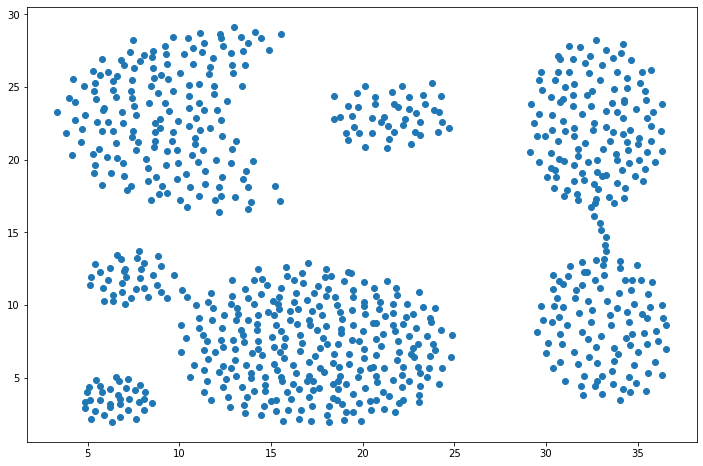

In [22]:
## 这里是画出平面坐标的散点图
plt.figure(figsize=((12,8)))
plt.scatter(data[:,0],data[:,1])
plt.savefig('./平面坐标散点图.png',dpi = 600)
plt.show()

In [24]:
# 选取初始点，直接去前面k个作为初始点。
k = 8
middle = choose_function(data,k)   # 这里是选取前7个样本点作为聚类的初始点
print(middle)


[[ 6.8  26.85]
 [ 5.4   2.7 ]
 [10.75 26.55]
 [ 7.55 23.7 ]
 [30.25 24.3 ]
 [21.   22.6 ]
 [17.65  7.05]
 [10.35 19.  ]]


In [39]:
cnt = 1000
for i in range(cnt):  # 总共聚类cnt次
    lable = distanse_function(data,middle,k)  # 首先是提取出标签，也就是每个样本点的原始标签。
    lable = np.expand_dims(lable,axis =1)   # 增加维度
    x_y = np.column_stack((data,lable))   # 将数据合并
    
    middle = upd_function(x_y,middle,k)   # 这里将聚类中心带你进行更新，
    

    

In [42]:
print(middle)
middle = pd.DataFrame(middle)
middle.to_csv('./中心点.csv')

[[ 9.18370787 25.7747191 ]
 [10.18881579  4.27171053]
 [21.54333333 23.00333333]
 [ 9.57037037 19.85061728]
 [33.14278846  8.79375   ]
 [32.69453125 22.13789062]
 [19.47418478  7.06603261]
 [10.70740741 10.5845679 ]]


In [41]:
print(x_y)

[[15.55 28.65  0.  ]
 [14.9  27.55  0.  ]
 [14.45 28.35  0.  ]
 ...
 [ 8.5   3.25  1.  ]
 [ 8.1   3.55  1.  ]
 [ 8.15  4.    1.  ]]


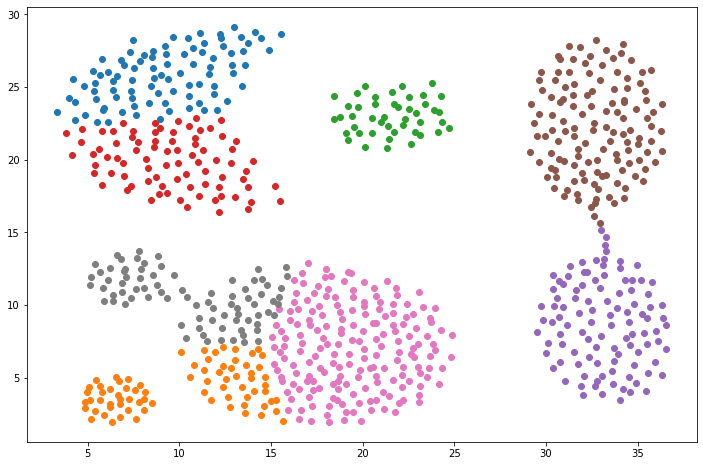

In [34]:
# 数据可视化。
plt.figure(figsize=(12,8))
plt.scatter(x_y[x_y[:,2] == 0][:,0],x_y[x_y[:,2]==0][:,1])
plt.scatter(x_y[x_y[:,2] == 1][:,0],x_y[x_y[:,2]==1][:,1])
plt.scatter(x_y[x_y[:,2] == 2][:,0],x_y[x_y[:,2]==2][:,1])
plt.scatter(x_y[x_y[:,2] == 3][:,0],x_y[x_y[:,2]==3][:,1])
plt.scatter(x_y[x_y[:,2] == 4][:,0],x_y[x_y[:,2]==4][:,1])
plt.scatter(x_y[x_y[:,2] == 5][:,0],x_y[x_y[:,2]==5][:,1])
plt.scatter(x_y[x_y[:,2] == 6][:,0],x_y[x_y[:,2]==6][:,1])
plt.scatter(x_y[x_y[:,2] == 7][:,0],x_y[x_y[:,2]==7][:,1])
plt.savefig("./给定数据集初始化点.png",dpi = 600)   # 保存图片 注意 在show()之前  不然show会重新创建新的 图片
plt.show()

In [37]:
max_ = np.amax(data,axis=0)
min_ = np.amin(data,axis=0)  # 这里是求出最大值与最小值。
a = np.zeros([8,2])  #首先初始化一个middle大小的矩阵。
for i in range(8):
    for j in range(2):
        if j == 0:
            a[i,j] = np.random.uniform(min_[0],max_[0])
        else:
            a[i,j] = np.random.uniform(min_[1],max_[1])        

In [38]:
print(a)
a = middle

[[11.8382468   7.8433592 ]
 [14.99907486 16.57701112]
 [33.6014064  13.56414836]
 [ 6.28389533 29.00858044]
 [ 7.62799768 15.5230342 ]
 [14.21185008 24.93057837]
 [14.27023909 25.69598961]
 [26.84512788 21.37549929]]


In [14]:
a = pd.DataFrame(a)
a.to_csv('./随机数.csv')